# Developing a Naive Matching Algorithm

Starting with a set of functions that implement a basic version of the naive exact matching, the goal here was to add in strand-awareness; the final algorithm is capable of searching for a pattern withing a reference genome text in both the forward and reverse complement orientation.

This exercise was part of Coursera's Algorithms for DNA Sequencing course as part of the Genomic Data Science specialization offered by the Johns Hopkins Unversity.

In [1]:
# A basic implementation of naive exact matching algorithm
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [2]:
# This returns the reverse complement of an input DNA string
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


In [3]:
# This function parses a DNA reference genome froma file in FASTA format
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [4]:
# This function parses a file in FASTQ format to output sequences and quality scores
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [9]:
# Importing module to download directly in ipython
import requests

In [100]:
# loading the lambdavirus genome
url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
r = requests.get(url, allow_redirects=True)

In [101]:
open('lambdavirus.fa', 'wb').write(r.content)

49270

In [26]:
genome = readGenome('lambdavirus.fa')
genome

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATA

In [27]:
def naive(p, t):
    occurences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurences.append(i)
    return occurences

In [79]:
def is_palindrome(str):
    substring_size = len(str)//2
#     print(substring_size)
    prefix = str[:substring_size]
#     print(prefix)
    suffix = str[-1:-(substring_size+1):-1]
#     print(suffix)
    if prefix == suffix:
        return True
    else:
        return False


In [80]:
# Writing the modified naive matching algorithm that also checks reverse complement
def naive_with_rc(p, t):
    occurences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurences.append(i)
#     check for rc
    if is_palindrome(p):
        p_rc = reverseComplement(p)
        for i in range(len(t) - len(p_rc) + 1):
            match = True
            for j in range(len(p_rc)):
                if not t[i+j] == p_rc[j]:
                    match = False
                    break
            if match:
                occurences.append(i)
    return occurences

In [73]:
# Testing out algorithms below
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

1
C
C
[10, 23]


In [81]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [84]:
occurences = naive_with_rc('AGGT', genome)
print(len(occurences))

150


In [87]:
occurences = naive_with_rc(reverseComplement('AGGT'), genome)
print(len(occurences))

156


In [88]:
occurences = naive_with_rc('TTAA', genome)
print(len(occurences))

195


In [89]:
occurences = naive_with_rc('ACTAAGT', genome)
print(occurences)

[27733, 45382]


In [90]:
occurences = naive_with_rc(reverseComplement('ACTAAGT'), genome)
print(occurences)

[26028]


In [91]:
occurences = naive_with_rc('AGTCGA', genome)
print(occurences)

[18005, 23320, 33657, 44806]


In [92]:
occurences = naive_with_rc(reverseComplement('AGTCGA'), genome)
print(occurences)

[450, 1908, 2472, 41927, 45369]


In [93]:
def naive_2mm(p, t):
    occurences = []
    for i in range(len(t) - len(p) + 1):
        num_mismatches = 0
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                num_mismatches += 1
                if num_mismatches >2:
                    match = False
                    break
        if match:
            occurences.append(i)
    return occurences

In [95]:
occurences = naive_2mm('TTCAAGCC', genome)
len(occurences)

191

In [96]:
occurences = naive_2mm('TTCAAGCC', genome)
occurences

[45,
 418,
 656,
 776,
 975,
 1311,
 1346,
 3166,
 3265,
 3292,
 3544,
 4237,
 4378,
 4481,
 4518,
 5240,
 5369,
 5597,
 5773,
 5871,
 5971,
 6350,
 6365,
 6564,
 6572,
 6684,
 6731,
 6764,
 6765,
 6929,
 7026,
 7487,
 7783,
 7790,
 8222,
 8251,
 8284,
 8749,
 9078,
 9197,
 9506,
 9942,
 10734,
 10969,
 11211,
 11331,
 11453,
 11640,
 11973,
 12711,
 13670,
 13750,
 13884,
 14687,
 14884,
 15745,
 16293,
 16817,
 17107,
 17349,
 17541,
 17779,
 17838,
 18792,
 19067,
 19719,
 19779,
 21614,
 21854,
 22174,
 22462,
 22722,
 22956,
 23126,
 23522,
 23677,
 23683,
 23820,
 23885,
 24369,
 24584,
 24787,
 25116,
 25554,
 26046,
 26665,
 26887,
 27237,
 27258,
 28166,
 28276,
 28531,
 28639,
 28920,
 28963,
 29021,
 29144,
 29733,
 29921,
 30176,
 30278,
 30362,
 30395,
 30536,
 30721,
 30967,
 31049,
 31379,
 31449,
 31474,
 31482,
 31641,
 31732,
 31749,
 31829,
 31867,
 31872,
 32523,
 32640,
 32754,
 32779,
 32857,
 32977,
 33079,
 33107,
 33371,
 33403,
 33653,
 33686,
 33863,
 34061,


In [97]:
url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq'
r = requests.get(url, allow_redirects=True)


In [99]:
open('ERR037900_1.first1000.fastq', 'wb').write(r.content)

241626

In [102]:
def get_q(char):
    q = ord(char)-33
    return q


In [105]:
seqs,quals = readFastq('ERR037900_1.first1000.fastq')
seqs

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNAACCTAACCCTAACCCTAACTCTAACCCTAACC',
 'ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTANCCCTAACCCTAACCCTAACCCTAACCCTAACCC',
 'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTA

In [110]:
qual_scores = []
for qual_str in quals:
    qual = [get_q(char) for char in qual_str]
    qual_scores.append(qual)


In [113]:
avg_quals = []
for pos in range(100):
    total = 0
    for read_scores in qual_scores:
        total += read_scores[pos]
    mean = total/len(qual_scores)
    avg_quals.append(mean)
avg_quals

[38.435,
 38.46,
 38.4,
 38.428,
 38.417,
 38.382,
 38.362,
 38.364,
 38.325,
 38.343,
 38.194,
 38.154,
 38.089,
 38.152,
 38.153,
 38.099,
 38.055,
 38.041,
 38.067,
 38.15,
 38.087,
 37.989,
 38.009,
 37.909,
 38.028,
 37.576,
 37.514,
 37.503,
 37.578,
 37.552,
 37.629,
 37.555,
 37.548,
 37.433,
 37.402,
 37.343,
 37.198,
 37.126,
 37.158,
 36.904,
 36.742,
 36.677,
 36.645,
 36.493,
 36.509,
 36.375,
 36.205,
 35.974,
 35.847,
 35.673,
 34.832,
 34.739,
 34.399,
 34.402,
 34.025,
 33.025,
 32.882,
 32.741,
 32.573,
 32.224,
 30.805,
 30.666,
 30.343,
 30.131,
 29.463,
 17.891,
 4.526,
 17.881,
 17.865,
 17.852,
 17.466,
 17.131,
 17.134,
 17.098,
 16.852,
 23.745,
 23.958,
 23.221,
 22.902,
 22.366,
 20.904,
 20.584,
 20.383,
 19.767,
 19.095,
 18.061,
 17.757,
 17.152,
 16.972,
 16.286,
 14.811,
 14.679,
 14.31,
 14.152,
 13.734,
 12.538,
 12.278,
 12.179,
 11.676,
 11.561]

In [114]:
import matplotlib.pyplot as plt

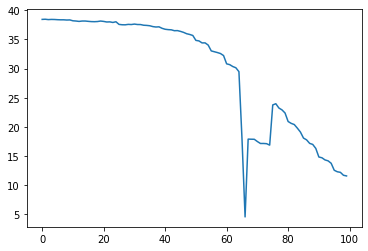

In [118]:
plt.plot(range(100),avg_quals)
plt.show()

In [119]:
for idx, score in enumerate(avg_quals):
    if score <6:
        print(score)
        print(idx)

4.526
66
